---
## Комментарий от наставника

Привет! Спасибо, что прислал задание:) В целом, работа производит неплохое впечатление, однако обрати внимание на некоторые мои комментарии. Они обозначены пометкой *Комментарий от наставника*. Пострайся учесть эти комментарии.

---

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats as st
import numpy as np

# Описание проекта
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».  

Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  

Нужно ***проанализировать поведение клиентов и сделать вывод — какой тариф лучше.***

---
## Комментарий от наставника


Правильно, что есть краткое вступление в работу, описание того, что надо делать. В работе необходимо приводить краткий план того, что надо сделать(если этот план имеется), а также информацию о входных данных: какие столбцы есть в таблице, их названия и какую информацию они несут. Также название работы лучше отображать в отдельной ячейке и делать крупный шрифт (заголовок). Так работа выглядит презентабельно.

---

# Шаг 1. Откройте файл с данными и изучите общую информацию


In [2]:
calls = pd.read_csv('/datasets/calls.csv', sep=',' , decimal='.')
internet = pd.read_csv('/datasets/internet.csv', sep=',' , decimal='.')
messages = pd.read_csv('/datasets/messages.csv', sep=',' , decimal='.')
tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',' , decimal='.')
users = pd.read_csv('/datasets/users.csv', sep=',' , decimal='.')

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [6]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [9]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
tariffs

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [13]:
users.groupby('tariff').agg(['count'])

,user_id,age,churn_date,city,first_name,last_name,reg_date
,count,count,count,count,count,count,count
tariff,,,,,,,
smart,351,351,23,351,351,351,351
ultra,149,149,15,149,149,149,149


In [14]:
# df_user_call = (df_call
# #Группировка по клиенту и месяцу
#                 .groupby(['user_id', 'call_date_month'])
# #добавление колонки месяца, подсчет количества и суммы минут
#                 .agg({'call_date_month':'median', 'duration':['count', 'sum']})
# #добавление информации о тарифе
#                 .merge(df_user.loc[:, ['user_id', 'tariff']], on='user_id', how='right'))
# #переименование столбцов
# df_user_call.columns = ['user_id', 'call_date_month', 'calls_count', 'duration_sum', 'tariff_name']
# #добавление информации по тарифу
# df_user_call = df_user_call.merge(df_tarif.loc[:, ['tariff_name', 'minutes_included', 'rub_per_minute']], on='tariff_name', how='outer')



In [15]:
print(calls.head())
print()
print(internet.head())
print()
print(messages.head())

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000

       id  mb_used session_date  user_id
0  1000_0   112.95   2018-11-25     1000
1  1000_1  1052.81   2018-09-07     1000
2  1000_2  1197.26   2018-06-25     1000
3  1000_3   550.27   2018-08-22     1000
4  1000_4   302.56   2018-09-24     1000

       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000


---
## Комментарий от наставника


После проведения первичного взгляда на данные надо описать обнаруженные закономерности, проблемы в данных и способы их решения.
    
---

# Шаг 2. Подготовьте данные


Приведите данные к нужным типам;  

Найдите и исправьте ошибки в данных.  

Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что у большого количества звонков длительность — 0.0 минут. Это проблема в данных, нужна предобработка.  


Посчитайте для каждого пользователя:  
количество сделанных звонков и израсходованных минут разговора по месяцам;  
количество отправленных сообщений по месяцам;  
объем израсходованного интернет-трафика по месяцам;  
помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;   остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

###### Исправим на тип datetime

In [16]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')


user_id везде int, верный  
duration, mb used — float, ok

###### Добавим месяц везде

In [17]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [18]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


###### Разберемся с длительностью звонков

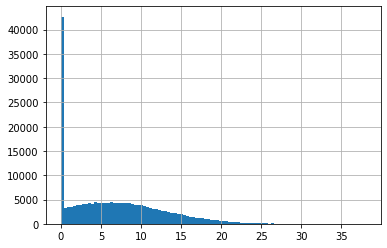

In [19]:
calls['duration'].hist(bins=100)

In [20]:
len(calls['duration'])

202607

In [21]:
len(calls.query('duration == 0'))

39613

"Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута." Значит, этих звонков не было или еще какая-то ошибка. Надо удалить эти звонки

In [22]:
zero_calls = calls.query('duration == 0')
len(zero_calls.groupby('user_id'))

492

Почти у всех пользователей есть нулевые звонки

In [23]:
zero_calls.groupby('month')['duration'].count()

month
1      312
2      623
3     1304
4     1768
5     2531
6     2883
7     3518
8     4231
9     4615
10    5389
11    5837
12    6602
Name: duration, dtype: int64

И в каждом месяце есть нулевые звонки. Займусь объединением столбцов, а потом подумаю, как это решить. Может просто удалить.

In [24]:
calls = calls.query('duration > 0')

len(calls)

162994

---
## Комментарий от наставника


Согласно описанной гипотезы звонки с нулевой длительностью удалены, верно.

---


Посчитайте для каждого пользователя:  
количество сделанных звонков и израсходованных минут разговора по месяцам;  
+++количество отправленных сообщений по месяцам;  
+++объем израсходованного интернет-трафика по месяцам;  
помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;   остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

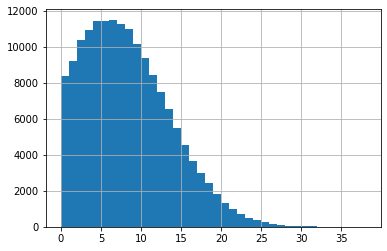

In [25]:
calls['duration'].hist(bins=38)

###### Округлим звонки до целых минут в большую сторону, как считает оператор. 

In [26]:
calls['duration'] = calls['duration'].apply(pd.np.ceil)


---
## Комментарий от наставника

Правильно, что округление производится перед суммированием. Это согласуется с логикой того, как оператор считает выручку с одного звонка. Оплата снимается после проведения самого звонка после округления длительности самого звонка.
    
---

In [27]:
num_of_calls = calls.groupby(['user_id', 'month']).agg(['count', 'sum'])['duration']
num_of_calls

count    sum
user_id month              
1000    5         17  159.0
        6         28  172.0
        7         41  340.0
        8         42  408.0
        9         46  466.0
...              ...    ...
1498    10        30  247.0
1499    9          8   70.0
        10        44  449.0
        11        62  612.0
        12        56  492.0

[3168 rows x 2 columns]

In [28]:
num_of_messages = messages.groupby(['user_id', 'month'])['id'].count()
num_of_messages

user_id  month
1000     5        22
         6        60
         7        75
         8        81
         9        57
                  ..
1498     10       42
1499     9        11
         10       48
         11       59
         12       66
Name: id, Length: 2717, dtype: int64

In [29]:
num_of_internet = internet.groupby(['user_id', 'month'])['mb_used'].sum()
num_of_internet

user_id  month
1000     5         2253.49
         6        23233.77
         7        14003.64
         8        14055.93
         9        14568.91
                    ...   
1498     10       20579.36
1499     9         1845.75
         10       17788.51
         11       17963.31
         12       13055.58
Name: mb_used, Length: 3203, dtype: float64

In [30]:
df_event_numbers = pd.concat([num_of_calls, num_of_messages, num_of_internet], axis=1)
df_event_numbers

count    sum    id   mb_used
user_id month                              
1000    5       17.0  159.0  22.0   2253.49
        6       28.0  172.0  60.0  23233.77
        7       41.0  340.0  75.0  14003.64
        8       42.0  408.0  81.0  14055.93
        9       46.0  466.0  57.0  14568.91
...              ...    ...   ...       ...
1498    10      30.0  247.0  42.0  20579.36
1499    9        8.0   70.0  11.0   1845.75
        10      44.0  449.0  48.0  17788.51
        11      62.0  612.0  59.0  17963.31
        12      56.0  492.0  66.0  13055.58

[3214 rows x 4 columns]

---
## Комментарий от наставника

Число мегабайт в месяц также лучше округлить.

---

In [31]:
df_event_numbers = df_event_numbers.reset_index()
df_event_numbers

,user_id,month,count,sum,id,mb_used
0,1000,5,17.0,159.0,22.0,2253.49
1,1000,6,28.0,172.0,60.0,23233.77
2,1000,7,41.0,340.0,75.0,14003.64
3,1000,8,42.0,408.0,81.0,14055.93
4,1000,9,46.0,466.0,57.0,14568.91
...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,20579.36
3210,1499,9,8.0,70.0,11.0,1845.75
3211,1499,10,44.0,449.0,48.0,17788.51
3212,1499,11,62.0,612.0,59.0,17963.31


Переименуем колонки:  
Количество звонков calls_count  
Количество минут: minutes_sum  
Количество смс: sms_sum



In [32]:
df_event_numbers.rename(columns={'count': 'calls_count', 'sum': 'minutes_sum', 'id': 'sms_sum'}, inplace=True)
df_event_numbers.head()

,user_id,month,calls_count,minutes_sum,sms_sum,mb_used
0,1000,5,17.0,159.0,22.0,2253.49
1,1000,6,28.0,172.0,60.0,23233.77
2,1000,7,41.0,340.0,75.0,14003.64
3,1000,8,42.0,408.0,81.0,14055.93
4,1000,9,46.0,466.0,57.0,14568.91


###### помесячную выручку с каждого пользователя   
(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;   
остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

###### Добавить в таблицу:   
+1. Тариф  
+2. Город  
+3. Абонентская плата  
+4. Минуты сверх - руб  
+5. СМС сверх - руб  
+6. МБ сверх - руб  
+7. Плата сверх лимита  
+8. Итоговая сумма за месяц  


In [33]:
df_all = pd.merge(df_event_numbers, users.loc[:, ['tariff', 'city', 'age', 'reg_date', 'user_id']], on='user_id')
df_all.head()

,user_id,month,calls_count,minutes_sum,sms_sum,mb_used,tariff,city,age,reg_date
0,1000,5,17.0,159.0,22.0,2253.49,ultra,Краснодар,52,2018-05-25
1,1000,6,28.0,172.0,60.0,23233.77,ultra,Краснодар,52,2018-05-25
2,1000,7,41.0,340.0,75.0,14003.64,ultra,Краснодар,52,2018-05-25
3,1000,8,42.0,408.0,81.0,14055.93,ultra,Краснодар,52,2018-05-25
4,1000,9,46.0,466.0,57.0,14568.91,ultra,Краснодар,52,2018-05-25


###### Тариф «Смарт»  
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 3 рубля  
сообщение: 3 рубля  
1 Гб интернет-трафика: 200 рублей  

###### Тариф «Ультра»  
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

In [34]:
def how_much_minutes(raw):
    if raw['tariff'] == 'smart':
        if raw['minutes_sum'] - 500 > 0:
            return (raw['minutes_sum'] - 500)*3
        return 0
    else:
        if raw['minutes_sum'] - 3000 > 0:
            return raw['minutes_sum'] - 3000
        return 0

    
def how_much_messages(raw):
    if raw['tariff'] == 'smart':
        if raw['sms_sum'] - 50 > 0:
            return (raw['sms_sum'] - 50)*3
        return 0
    else:
        if raw['sms_sum'] - 1000 > 0:
            return raw['sms_sum'] - 1000
        return 0
    
def how_much_web(raw):
    if raw['tariff'] == 'smart':
        if raw['mb_used']/1000 - 15 > 0:
            return (raw['mb_used']/1024 - 15)*200
        return 0
    else:
        if raw['mb_used']/1000 - 30 > 0:
            return (raw['mb_used']/1024 - 30)*150
        return 0    

    
def tarif_pay_function(raw):
    if raw['tariff'] == 'smart':
        return 550
    return 1950
    
df_all['minutes_up_rub'] = df_all.apply(how_much_minutes, axis = 1)  
df_all['sms_up_rub'] = df_all.apply(how_much_messages, axis = 1)  
df_all['mb_up_rub'] = df_all.apply(how_much_web, axis = 1)  
df_all['tarif_pay'] = df_all.apply(tarif_pay_function, axis = 1)
df_all['all_money_per_month'] = (df_all['minutes_up_rub'] + 
                                 df_all['sms_up_rub'] + 
                                 df_all['mb_up_rub'] + 
                                 df_all['tarif_pay']
                                )

df_all

,user_id,month,calls_count,minutes_sum,sms_sum,mb_used,tariff,city,age,reg_date,minutes_up_rub,sms_up_rub,mb_up_rub,tarif_pay,all_money_per_month
0,1000,5,17.0,159.0,22.0,2253.49,ultra,Краснодар,52,2018-05-25,0.0,0.0,0.000000,1950,1950.000000
1,1000,6,28.0,172.0,60.0,23233.77,ultra,Краснодар,52,2018-05-25,0.0,0.0,0.000000,1950,1950.000000
2,1000,7,41.0,340.0,75.0,14003.64,ultra,Краснодар,52,2018-05-25,0.0,0.0,0.000000,1950,1950.000000
3,1000,8,42.0,408.0,81.0,14055.93,ultra,Краснодар,52,2018-05-25,0.0,0.0,0.000000,1950,1950.000000
4,1000,9,46.0,466.0,57.0,14568.91,ultra,Краснодар,52,2018-05-25,0.0,0.0,0.000000,1950,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,20579.36,smart,Владикавказ,68,2018-07-19,0.0,0.0,1019.406250,550,1569.406250
3210,1499,9,8.0,70.0,11.0,1845.75,smart,Пермь,35,2018-09-27,0.0,0.0,0.000000,550,550.000000
3211,1499,10,44.0,449.0,48.0,17788.51,smart,Пермь,35,2018-09-27,0.0,0.0,474.318359,550,1024.318359
3212,1499,11,62.0,612.0,59.0,17963.31,smart,Пермь,35,2018-09-27,336.0,27.0,508.458984,550,1421.458984


---
## Комментарий от наставника

Для того, чтобы выручка была целым числом, как раз и надо округлять значения интернет-трафика. В остальном все верно, финальная таблица получена. Здорово, что она не содержит излишней информации, которая не пригодится нам в анализе.

---

In [35]:
df_all.groupby('tariff')['all_money_per_month'].agg(['mean', 'median', 'count', 'sum']).round()

,mean,median,count,sum
tariff,,,,
smart,1230.0,958.0,2229,2741474.0
ultra,2059.0,1950.0,985,2028419.0


Средний чек в тарифе "Ультра" — 2059 руб, в "смарт" — 1230.   
Медианный —  "Ультра" — 1950 руб, в "смарт" — 958.   

Пользователей в тарифе "смарт" в 2.3 раза больше и суммарно они приносят больше денег.

# Шаг 3. Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки.

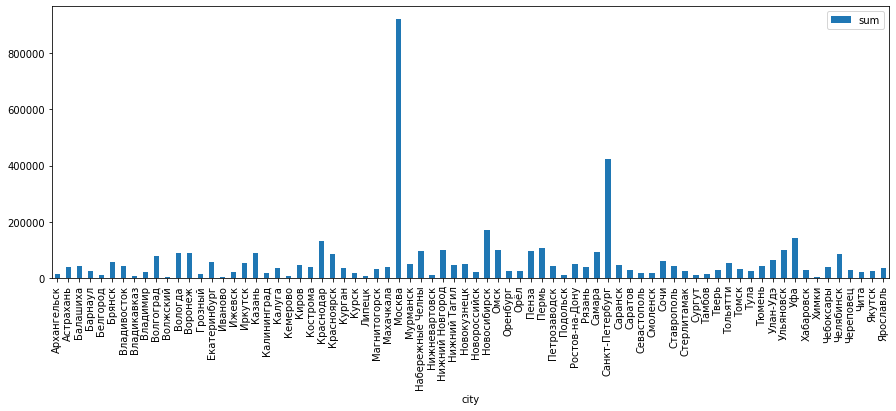

In [36]:
df_all.groupby('city')['all_money_per_month'].agg(['sum']).plot(kind='bar', figsize=(15,5))

Понятно, что по количеству людей Москва и Питер лидируют. Посмотрим, в пересчете на одного пользователя — какой средний и медианный доход.

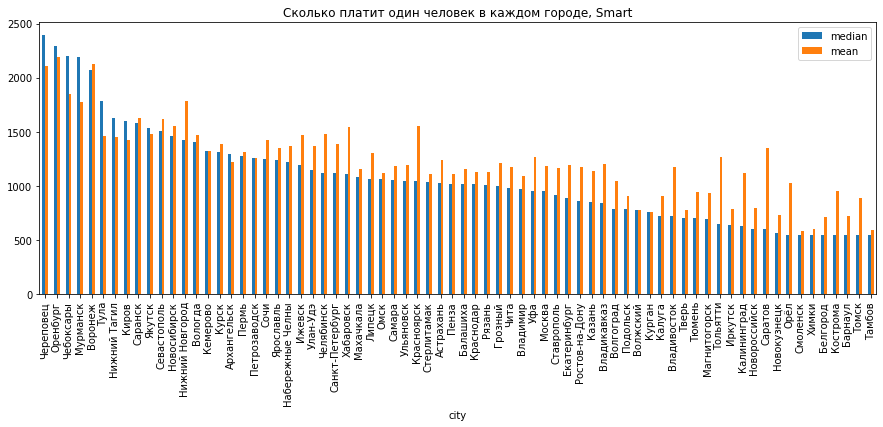

In [37]:
(df_all.query('tariff == "smart"')
    .groupby('city')['all_money_per_month']
    .agg(['median', 'mean'])
    .sort_values(by='median', ascending=False)
    .plot(kind='bar', figsize=(15,5), title='Сколько платит один человек в каждом городе, Smart')
)


В тарифе Smart в среднем больше всего платят в Череповце и Оренбурге (примерно 2100 рублей). Меньше всех — Тамбов (примерно 550)

In [38]:
(df_all.query('tariff == "smart"')
    .groupby('city')['all_money_per_month']
    .agg(['median', 'mean'])
    .sort_values(by='median', ascending=False)
)

,median,mean
city,,
Череповец,2390.888672,2103.029119
Оренбург,2290.067383,2194.675781
Чебоксары,2197.971680,1851.706217
Мурманск,2189.000000,1770.871449
Воронеж,2072.201172,2127.732178
...,...,...
Белгород,550.000000,716.828776
Кострома,550.000000,954.453559
Барнаул,550.000000,725.630022


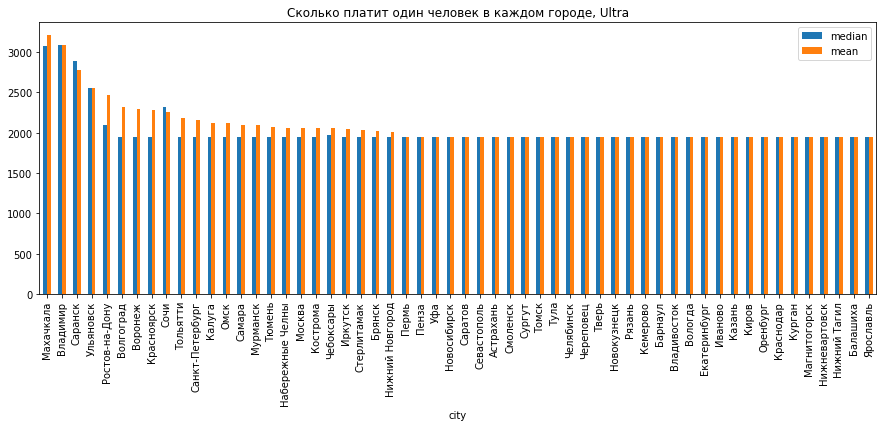

In [39]:
(df_all.query('tariff == "ultra"')
    .groupby('city')['all_money_per_month']
    .agg(['median', 'mean'])
    .sort_values(by='mean', ascending=False)
    .plot(kind='bar', figsize=(15,5), title='Сколько платит один человек в каждом городе, Ultra')
)

В тарифе Ultra в основном платят только абонентскую плату. Только в Махачкале, Владимире, Саранске, Ульяновске и Ростове-на-Дону платят больше — до 3 тысяч в месяц. 

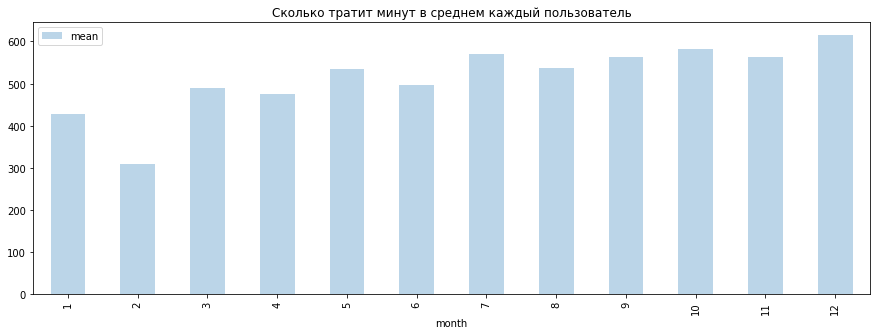

In [40]:
minutes_per_user = (df_all.query('tariff == "ultra"')
    .groupby(['month'])['minutes_sum']
    .agg(['mean'])
    
    )
# .sort_values(by='mean', ascending=False)
minutes_per_user.plot(kind='bar', figsize=(15,5), title='Сколько тратит минут в среднем каждый пользователь', alpha=0.3)

In [41]:
minutes_per_user

,mean
month,
1,428.111111
2,310.043478
3,489.648649
4,475.301887
5,534.250000
6,497.469136
7,570.885057
8,535.813725
9,563.963636


###### Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?  


In [42]:
list_w_parametrs = ['minutes_sum', 'sms_sum', 'mb_used']

tarif_ultra = df_all.query('tariff == "ultra"')
tarif_smart = df_all.query('tariff == "smart"')

for name in list_w_parametrs:
    print('Тариф Ультра', name, int(tarif_ultra[name].mean()))
    
print()
for name in list_w_parametrs:
    print('Тариф Смарт', name, int(tarif_smart[name].mean()))

Тариф Ультра minutes_sum 547
Тариф Ультра sms_sum 61
Тариф Ультра mb_used 19668

Тариф Смарт minutes_sum 419
Тариф Смарт sms_sum 38
Тариф Смарт mb_used 16215


---
## Комментарий от наставника

При работе с выборками желательно записывать средние значения с их доверительными интервалами.

---

###### В среднем пользователи тарифов Ультра/Смарт используют в месяц:  
    Минут: 547/419  
    СМС: 61/38  
    Гигабайт: 20/16

Гистограммы, сколько человек сколько минут, сколько смс, сколько мб

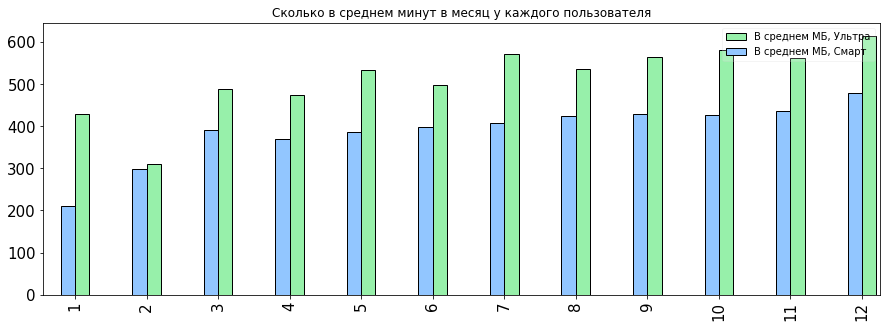

In [43]:
# задаем размеры будущего графика
plt.figure(figsize=(15,5)) 

# создаем пустой график
ax = plt.gca()


# формируем 1ый датафрейм для рисования
df_to_plot1 = (df_all.query('tariff == "ultra"')
    .groupby(['month'])['minutes_sum']
    .agg(['mean']))

plot1 = df_to_plot1.plot(y="mean", kind='bar', ec='black', title='Сколько в среднем минут в месяц у каждого пользователя',
                         legend=None, color='#97F0AA', fontsize=15, ax=ax, width=0.2, position=0)
# формируем 2ой датафрейм для рисования
df_to_plot2 = (df_all.query('tariff == "smart"')
    .groupby(['month'])['minutes_sum']
    .agg(['mean'])
    
    )
# рисуем вторые данные - весь СПб - обратите внимание на ax=ax и position 
plot2 = df_to_plot2.plot(y="mean", kind='bar', ec='black', title=None,
                         legend=None, color='#92c6ff', fontsize=15, ax=ax, width=0.2, position=1)

# добавляем легенду (loc - позиция на графике, framealpha - степень прозрачности области, где рисуется легенда (0 - отсутствует, 1 - не прозрачно)) 
ax.legend(['В среднем МБ, Ультра', 'В среднем МБ, Смарт'], loc=1, framealpha=0.2)
# убираем подпись графика по оси Ох ('day')
ax.xaxis.label.set_visible(False)



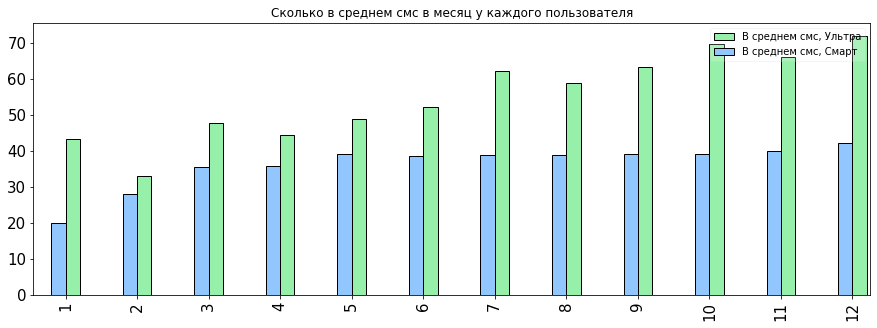

In [44]:
# задаем размеры будущего графика
plt.figure(figsize=(15,5)) 

# создаем пустой график
ax = plt.gca()


# формируем 1ый датафрейм для рисования
df_to_plot1 = (df_all.query('tariff == "ultra"')
    .groupby(['month'])['sms_sum']
    .agg(['mean']))

plot1 = df_to_plot1.plot(y="mean", kind='bar', ec='black', title='Сколько в среднем смс в месяц у каждого пользователя',
                         legend=None, color='#97F0AA', fontsize=15, ax=ax, width=0.2, position=0)
# формируем 2ой датафрейм для рисования
df_to_plot2 = (df_all.query('tariff == "smart"')
    .groupby(['month'])['sms_sum']
    .agg(['mean'])
    
    )
# рисуем вторые данные - весь СПб - обратите внимание на ax=ax и position 
plot2 = df_to_plot2.plot(y="mean", kind='bar', ec='black', title=None,
                         legend=None, color='#92c6ff', fontsize=15, ax=ax, width=0.2, position=1)

# добавляем легенду (loc - позиция на графике, framealpha - степень прозрачности области, где рисуется легенда (0 - отсутствует, 1 - не прозрачно)) 
ax.legend([ 'В среднем смс, Ультра', 'В среднем смс, Смарт'], loc=1, framealpha=0.2)
# убираем подпись графика по оси Ох ('day')
ax.xaxis.label.set_visible(False)



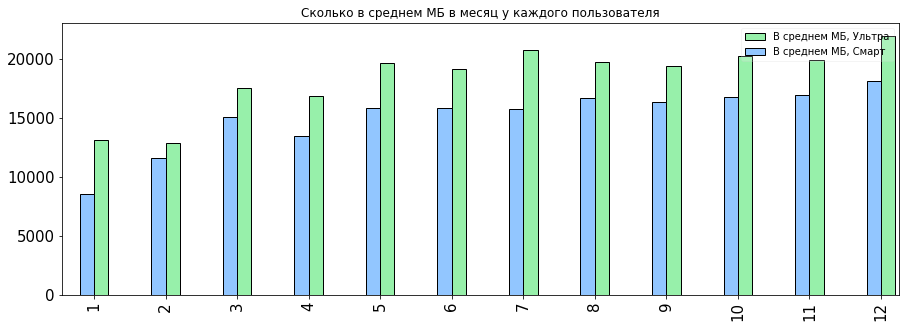

In [45]:
# задаем размеры будущего графика
plt.figure(figsize=(15,5)) 

# создаем пустой график
ax = plt.gca()


# формируем 1ый датафрейм для рисования
df_to_plot1 = (df_all.query('tariff == "ultra"')
    .groupby(['month'])['mb_used']
    .agg(['mean']))

plot1 = df_to_plot1.plot(y="mean", kind='bar', ec='black', title='Сколько в среднем МБ в месяц у каждого пользователя',
                         legend=None, color='#97F0AA', fontsize=15, ax=ax, width=0.2, position=0)
# формируем 2ой датафрейм для рисования
df_to_plot2 = (df_all.query('tariff == "smart"')
    .groupby(['month'])['mb_used']
    .agg(['mean'])
    
    )
# рисуем вторые данные - весь СПб - обратите внимание на ax=ax и position 
plot2 = df_to_plot2.plot(y="mean", kind='bar', ec='black', title=None,
                         legend=None, color='#92c6ff', fontsize=15, ax=ax, width=0.2, position=1)

# добавляем легенду (loc - позиция на графике, framealpha - степень прозрачности области, где рисуется легенда (0 - отсутствует, 1 - не прозрачно)) 
ax.legend(['В среднем МБ, Ультра', 'В среднем МБ, Смарт'], loc=1, framealpha=0.2)
# убираем подпись графика по оси Ох ('day')
ax.xaxis.label.set_visible(False)



+++Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?  
+++Посчитайте среднее количество,  
+++дисперсию и  
+++стандартное отклонение.  
+++Постройте гистограммы.  
+++Опишите распределения.

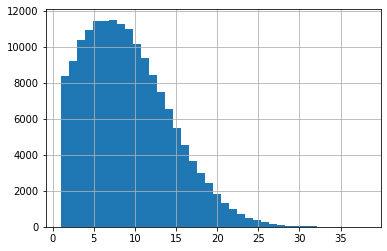

In [46]:
calls['duration'].hist(bins=(len(calls['duration'].unique())))

Распределение минут скошено вправо и напоминает распределение Пуассона.

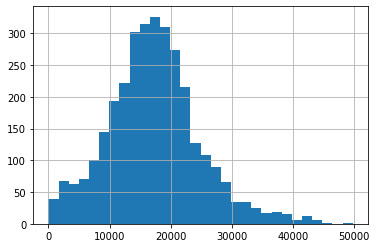

In [47]:
df_all['mb_used'].hist(bins=30)

Распределение по трафику напоминает нормальное. 

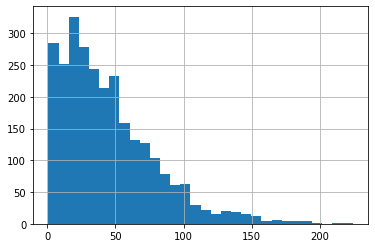

In [49]:
df_all['sms_sum'].hist(bins=30)

Распределение смс скошено вправо и напоминает распределение Пуассона.

###### Стандратное отклонение и дисперсия

In [50]:
import numpy as np

variance_ultra = np.var(tarif_ultra[['minutes_sum', 'sms_sum', 'mb_used']])
variance_ultra.round()

standard_deviation_ultra = np.std(tarif_ultra[['minutes_sum', 'sms_sum', 'mb_used']])
standard_deviation_smart = np.std(tarif_smart[['minutes_sum', 'sms_sum', 'mb_used']])

print('Стандартное отклонение в тарифе Ультра')
print(standard_deviation_ultra)

print()
print('Стандартное отклонение в тарифе Смарт')

print(standard_deviation_smart)

Стандартное отклонение в тарифе Ультра
minutes_sum     305.352036
sms_sum          45.902130
mb_used        9937.949976
dtype: float64

Стандартное отклонение в тарифе Смарт
minutes_sum     188.949852
sms_sum          26.780979
mb_used        5860.420616
dtype: float64


Дисперсия в тарифе "Ультра" выше по всем параметрам. Данные разбросаны сильнее.

---
## Комментарий от наставника

Базовые статистические параметры получены. Приведены необходимые графики. Верно, что они представлены на одном рисунке, таким образом их удобнее сравнивать между собой.

---

## Шаг 4. Проверьте гипотезы
средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;  
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;  
Пороговое значение alpha задайте самостоятельно.  
  
Поясните:  
как вы формулировали нулевую и альтернативную гипотезы;  
какой критерий использовали для проверки гипотез и почему.  


#### H0 средняя выручка пользователей тарифов «Ультра» и «Смарт» различается?


In [51]:
print('Средняя выручка тарифа Ультра', tarif_ultra['all_money_per_month'].mean().round())
print('Средняя выручка тарифа Смарт', tarif_smart['all_money_per_month'].mean().round())

Средняя выручка тарифа Ультра 2059.0
Средняя выручка тарифа Смарт 1230.0


Да, различается, в тарифе "Ультра" платят в среднем на 829 руб больше

---
## Комментарий от наставника

Также надо указывать доверительные интервалы.

---

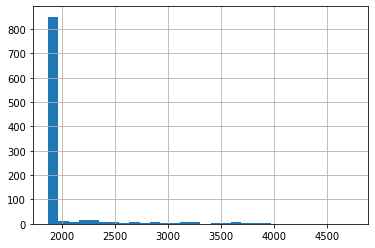

In [52]:
tarif_ultra['all_money_per_month'].hist(bins=30)

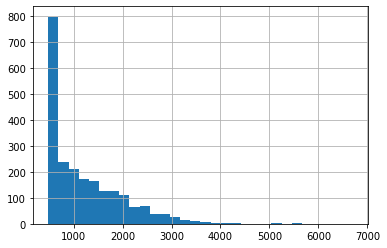

In [53]:
tarif_smart['all_money_per_month'].hist(bins=30)

In [54]:
tarif_smart['all_money_per_month'].max()

6699.775390624998

In [55]:
tarif_ultra['all_money_per_month'].max()

4736.966308593752

Используем данные из раздела "гипотеза о равенстве средних двух генеральных совокупностей" — представим, что одна совокупность — тариф смарт, вторая — ультра

In [56]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    tarif_smart['all_money_per_month'], 
    tarif_ultra['all_money_per_month'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 3.0165512508280686e-192
Отвергаем нулевую гипотезу


Статистически, вероятность случайности различий — 3%. Вывод — средняя выручка действительно различается!

---
## Комментарий от наставника

Перед проведением статистического теста стоит указывать нулевую и альтернативную гипотезы. Иначе не совсем понятно, что именно мы проверяем. Вероятность не 3%, мы получили крайне малое число: 10 в -192 степени. Вывод верный.

---

#### средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;  


In [57]:
df_all.query('city == "Москва"')['all_money_per_month'].mean()

1504.354717548077

In [58]:
df_all.query('city != "Москва"')['all_money_per_month'].mean()

1479.3441017200705

In [59]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df_all.query('city == "Москва"')['all_money_per_month'], 
    df_all.query('city != "Москва"')['all_money_per_month'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.47755630947697036
Не получилось отвергнуть нулевую гипотезу


Несмотря на то, что в Москве в среднем платят на 25 рублей больше, с вероятностью 48% различие в средних случайно. Средняя выручка в Москве соотвествует таковой в регионах.

## Шаг 5. Напишите общий вывод


###### Удаляем нулевые звонки
"Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута." Этих звонков не было или еще какая-то ошибка. 
Почти у всех пользователей есть нулевые звонки. И в каждом месяце есть нулевые звонки. 

###### Средний чек

Средний чек в тарифе "Ультра" — 2059 руб, в "смарт" — 1230.   
Медианный —  "Ультра" — 1950 руб, в "смарт" — 958.   

Пользователей в тарифе "смарт" в 2.3 раза больше и суммарно они приносят больше денег.

В тарифе Smart в среднем больше всего платят в Череповце и Оренбурге (примерно 2100 рублей). Меньше всех — Тамбов (примерно 550)

В тарифе Ultra в основном платят только абонентскую плату. Только в Махачкале, Владимире, Саранске, Ульяновске и Ростове-на-Дону платят больше — до 3 тысяч в месяц. 

###### В среднем пользователи тарифов Ультра/Смарт используют в месяц:  
    Минут: 547/419  
    СМС: 61/38  
    Гигабайт: 20/16
  
###### Распределения
Распределение минут скошено вправо и напоминает распределение Пуассона.

Распределение по трафику напоминает нормальное. 

Распределение смс скошено вправо и напоминает распределение Пуассона.

###### Дисперсия и стандартное отклонение
Дисперсия в тарифе "Ультра" выше по всем параметрам. Данные разбросаны сильнее.

#### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается?

Да, различается, в тарифе "Ультра" платят в среднем на 829 руб больше
Статистически, вероятность случайности различий — 3%. Вывод — средняя выручка действительно различается!

#### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;  
Несмотря на то, что в Москве в среднем платят на 25 рублей больше, с вероятностью 48% различие в средних случайно. Средняя выручка в Москве соотвествует таковой в регионах.

---
## Комментарий от наставника

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Также можно расписать все, что было сделано и какими методами. 

---

## Комментарий от наставника

- Вначале работы следует описывать данные с которыми работаешь;
- Если еще не встречался с библиотекой seaborn, то изучи ее. Можно строить презентабельные графики с ее помощью;
- Прописывай гипотезы, которые проверяешь;
- Изучи, как можно построить доверительный интервал для выборочного среднего.

Ты проделал большую работу, молодец! Продолжай в том же духе :)

-----